In [39]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
# Load the dataset
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions_3000.csv')


In [41]:
# Display initial data types and distributions
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH DATE                     3000 non-null   object 
 1   CRASH TIME                     3000 non-null   object 
 2   BOROUGH                        2063 non-null   object 
 3   ZIP CODE                       2062 non-null   float64
 4   LATITUDE                       2659 non-null   float64
 5   LONGITUDE                      2659 non-null   float64
 6   LOCATION                       2659 non-null   object 
 7   ON STREET NAME                 2385 non-null   object 
 8   CROSS STREET NAME              1898 non-null   object 
 9   OFF STREET NAME                484 non-null    object 
 10  NUMBER OF PERSONS INJURED      3000 non-null   float64
 11  NUMBER OF PERSONS KILLED       3000 non-null   float64
 12  NUMBER OF PEDESTRIANS INJURED  3000 non-null   i

In [42]:
print(df.describe())

           ZIP CODE     LATITUDE    LONGITUDE  NUMBER OF PERSONS INJURED  \
count   2062.000000  2659.000000  2659.000000                3000.000000   
mean   10834.907371    40.586049   -73.717535                   0.288000   
std      560.032279     2.366982     4.956455                   0.648996   
min    10000.000000     0.000000  -201.237060                   0.000000   
25%    10305.000000    40.667785   -73.974042                   0.000000   
50%    11207.000000    40.722030   -73.929060                   0.000000   
75%    11249.000000    40.770336   -73.865731                   0.000000   
max    11694.000000    40.907227     0.000000                   7.000000   

       NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
count               3000.000000                    3000.000000   
mean                   0.000667                       0.052333   
std                    0.025816                       0.234406   
min                    0.000000                    

In [43]:
df.isnull().sum()

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                           937
ZIP CODE                          938
LATITUDE                          341
LONGITUDE                         341
LOCATION                          341
ON STREET NAME                    615
CROSS STREET NAME                1102
OFF STREET NAME                  2516
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1      12
CONTRIBUTING FACTOR VEHICLE 2     448
CONTRIBUTING FACTOR VEHICLE 3    2808
CONTRIBUTING FACTOR VEHICLE 4    2965
CONTRIBUTING FACTOR VEHICLE 5    2988
COLLISION_ID                        0
VEHICLE TYPE CODE 1                17
VEHICLE TYPE CODE 2               580
VEHICLE TYPE

In [44]:
# Fill missing values 
df['BOROUGH'].fillna('Unknown', inplace=True)
df['LATITUDE'].fillna(df['LATITUDE'].mean(), inplace=True)
df['LONGITUDE'].fillna(df['LONGITUDE'].mean(), inplace=True)

In [45]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/26/2012,9:55,BROOKLYN,11212.0,40.658218,-73.905877,"(40.658218, -73.9058765)",LOTT AVENUE,OSBORN STREET,NaN,...,Unspecified,NaN,NaN,NaN,160725,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN
1,11/05/2017,9:30,BROOKLYN,11226.0,40.650898,-73.947660,"(40.650898, -73.94766)",CHURCH AVENUE,EAST 32 STREET,NaN,...,Unspecified,NaN,NaN,NaN,3785587,Sedan,Sedan,NaN,NaN,NaN
2,10/26/2015,8:09,BROOKLYN,11208.0,40.668800,-73.867413,"(40.6687997, -73.8674131)",LINDEN BOULEVARD,HEMLOCK STREET,NaN,...,Unspecified,NaN,NaN,NaN,3323265,BUS,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
3,10/11/2012,11:06,MANHATTAN,10032.0,40.834061,-73.944880,"(40.834061, -73.9448799)",WEST 157 STREET,BROADWAY,NaN,...,Unspecified,NaN,NaN,NaN,68462,PICK-UP TRUCK,VAN,NaN,NaN,NaN
4,03/19/2022,11:33,MANHATTAN,10065.0,40.767185,-73.962480,"(40.767185, -73.96248)",EAST 68 STREET,3 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4511999,Pick-up Truck,Sedan,NaN,NaN,NaN


In [46]:
#Transform Count Features (log transformation)
df['total_casualties'] = df['NUMBER OF PERSONS INJURED'] + df['NUMBER OF PERSONS KILLED']

In [47]:
# Feature Engineering
# Convert 'DATE' and 'TIME' to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce')


In [48]:
df.head(3)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,total_casualties
0,2012-10-26,1900-01-01 09:55:00,BROOKLYN,11212.0,40.658218,-73.905877,"(40.658218, -73.9058765)",LOTT AVENUE,OSBORN STREET,NaN,...,NaN,NaN,NaN,160725,PASSENGER VEHICLE,UNKNOWN,NaN,NaN,NaN,0.0
1,2017-11-05,1900-01-01 09:30:00,BROOKLYN,11226.0,40.650898,-73.947660,"(40.650898, -73.94766)",CHURCH AVENUE,EAST 32 STREET,NaN,...,NaN,NaN,NaN,3785587,Sedan,Sedan,NaN,NaN,NaN,0.0
2,2015-10-26,1900-01-01 08:09:00,BROOKLYN,11208.0,40.668800,-73.867413,"(40.6687997, -73.8674131)",LINDEN BOULEVARD,HEMLOCK STREET,NaN,...,NaN,NaN,NaN,3323265,BUS,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,1.0


In [49]:
# Create new features
df['crash_hour'] = df['CRASH TIME'].dt.hour
df['crash_day_of_week'] = df['CRASH DATE'].dt.dayofweek  # Monday=0, Sunday=6
df['crash_day_of_month'] = df['CRASH DATE'].dt.day
df['crash_week_of_year'] = df['CRASH DATE'].dt.isocalendar().week


In [50]:
# Create cyclical features for time variables
df['hour_sin'] = np.sin(df['crash_hour'] * (2 * np.pi / 24))
df['hour_cos'] = np.cos(df['crash_hour'] * (2 * np.pi / 24))
df['day_sin'] = np.sin(df['crash_day_of_week'] * (2 * np.pi / 7))
df['day_cos'] = np.cos(df['crash_day_of_week'] * (2 * np.pi / 7))
df['month_sin'] = np.sin((df['crash_day_of_month'] - 1) * (2 * np.pi / 31))
df['month_cos'] = np.cos((df['crash_day_of_month'] - 1) * (2 * np.pi / 31))


In [51]:
df.isnull().sum()

CRASH DATE                          0
CRASH TIME                          0
BOROUGH                             0
ZIP CODE                          938
LATITUDE                            0
LONGITUDE                           0
LOCATION                          341
ON STREET NAME                    615
CROSS STREET NAME                1102
OFF STREET NAME                  2516
NUMBER OF PERSONS INJURED           0
NUMBER OF PERSONS KILLED            0
NUMBER OF PEDESTRIANS INJURED       0
NUMBER OF PEDESTRIANS KILLED        0
NUMBER OF CYCLIST INJURED           0
NUMBER OF CYCLIST KILLED            0
NUMBER OF MOTORIST INJURED          0
NUMBER OF MOTORIST KILLED           0
CONTRIBUTING FACTOR VEHICLE 1      12
CONTRIBUTING FACTOR VEHICLE 2     448
CONTRIBUTING FACTOR VEHICLE 3    2808
CONTRIBUTING FACTOR VEHICLE 4    2965
CONTRIBUTING FACTOR VEHICLE 5    2988
COLLISION_ID                        0
VEHICLE TYPE CODE 1                17
VEHICLE TYPE CODE 2               580
VEHICLE TYPE

In [52]:
# Drop original columns that are no longer needed
df.drop(columns=['CRASH TIME', 'CRASH DATE'], inplace=True)


In [55]:

# Transform Count Features: Apply log transformation to count features
count_features = ['total_casualties','NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED']
for feature in count_features:
    df[feature] = np.log1p(df[feature])  # log1p handles zero values


In [56]:


# Latitude and Longitude Transformation using Cluster Similarity
n_clusters = len(df['BOROUGH'].unique())
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['latitude_cluster'] = kmeans.fit_predict(df[['LATITUDE']])
df['longitude_cluster'] = kmeans.fit_predict(df[['LONGITUDE']])


In [57]:

# Define features for the preprocessing pipeline
numerical_features = count_features + ['LATITUDE', 'LONGITUDE', 'hour_sin', 'hour_cos', 'day_sin', 'day_cos', 'month_sin', 'month_cos', 'crash_week_of_year']
categorical_features = ['BOROUGH']

In [59]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [60]:
# Fit and transform the data
X = preprocessor.fit_transform(df)


In [61]:
# Convert the transformed data back to a DataFrame
feature_names = (numerical_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))
X_df = pd.DataFrame(X, columns=feature_names)


In [62]:
df.head()

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,crash_day_of_month,crash_week_of_year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,latitude_cluster,longitude_cluster
0,BROOKLYN,11212.0,40.658218,-73.905877,"(40.658218, -73.9058765)",LOTT AVENUE,OSBORN STREET,NaN,0.000000,0.0,...,26,43,0.707107,-0.707107,-0.433884,-0.900969,-0.937752,0.347305,3,3
1,BROOKLYN,11226.0,40.650898,-73.947660,"(40.650898, -73.94766)",CHURCH AVENUE,EAST 32 STREET,NaN,0.000000,0.0,...,5,44,0.707107,-0.707107,-0.781831,0.623490,0.724793,0.688967,3,3
2,BROOKLYN,11208.0,40.668800,-73.867413,"(40.6687997, -73.8674131)",LINDEN BOULEVARD,HEMLOCK STREET,NaN,0.526589,0.0,...,26,44,0.866025,-0.500000,0.000000,1.000000,-0.937752,0.347305,3,4
3,MANHATTAN,10032.0,40.834061,-73.944880,"(40.834061, -73.9448799)",WEST 157 STREET,BROADWAY,NaN,0.000000,0.0,...,11,41,0.258819,-0.965926,0.433884,-0.900969,0.897805,-0.440394,5,3
4,MANHATTAN,10065.0,40.767185,-73.962480,"(40.767185, -73.96248)",EAST 68 STREET,3 AVENUE,NaN,0.000000,0.0,...,19,11,0.258819,-0.965926,-0.974928,-0.222521,-0.485302,-0.874347,2,3


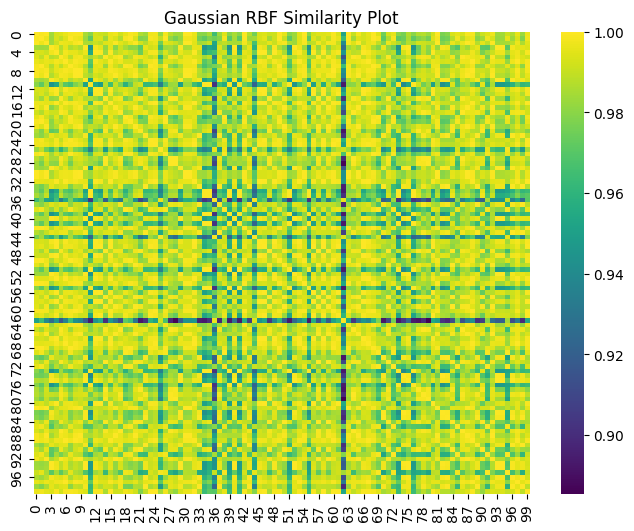

In [75]:
# Gaussian RBF Similarity Plot for 100 rows
from sklearn.metrics.pairwise import rbf_kernel
rbf_similarity = rbf_kernel(df[['LATITUDE', 'LONGITUDE']], gamma=0.5)
plt.figure(figsize=(8, 6))
sns.heatmap(rbf_similarity[:100,:100],cbar=True,fmt='.1f',cmap='viridis')
# sns.heatmap(rbf_similarity,cbar=True,annot=True,annot_kws={'size':8},cmap='YlOrRd')
plt.title('Gaussian RBF Similarity Plot')
plt.show()

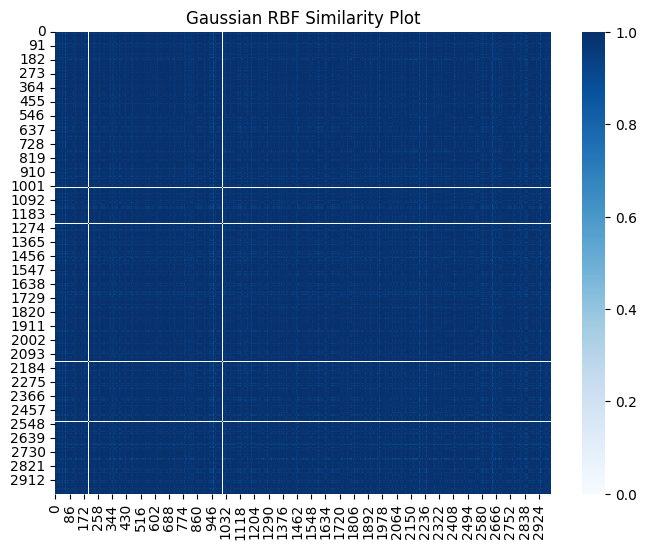

In [74]:
# Gaussian RBF Similarity Plot for all data poins
from sklearn.metrics.pairwise import rbf_kernel
rbf_similarity = rbf_kernel(df[['LATITUDE', 'LONGITUDE']], gamma=0.5)
plt.figure(figsize=(8, 6))
sns.heatmap(rbf_similarity,cbar=True,fmt='.1f',cmap='Blues')
# sns.heatmap(rbf_similarity,cbar=True,annot=True,annot_kws={'size':8},cmap='YlOrRd')
plt.title('Gaussian RBF Similarity Plot')
plt.show()

In [64]:
df.head()

,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,...,crash_day_of_month,crash_week_of_year,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,latitude_cluster,longitude_cluster
0,BROOKLYN,11212.0,40.658218,-73.905877,"(40.658218, -73.9058765)",LOTT AVENUE,OSBORN STREET,NaN,0.000000,0.0,...,26,43,0.707107,-0.707107,-0.433884,-0.900969,-0.937752,0.347305,3,3
1,BROOKLYN,11226.0,40.650898,-73.947660,"(40.650898, -73.94766)",CHURCH AVENUE,EAST 32 STREET,NaN,0.000000,0.0,...,5,44,0.707107,-0.707107,-0.781831,0.623490,0.724793,0.688967,3,3
2,BROOKLYN,11208.0,40.668800,-73.867413,"(40.6687997, -73.8674131)",LINDEN BOULEVARD,HEMLOCK STREET,NaN,0.526589,0.0,...,26,44,0.866025,-0.500000,0.000000,1.000000,-0.937752,0.347305,3,4
3,MANHATTAN,10032.0,40.834061,-73.944880,"(40.834061, -73.9448799)",WEST 157 STREET,BROADWAY,NaN,0.000000,0.0,...,11,41,0.258819,-0.965926,0.433884,-0.900969,0.897805,-0.440394,5,3
4,MANHATTAN,10065.0,40.767185,-73.962480,"(40.767185, -73.96248)",EAST 68 STREET,3 AVENUE,NaN,0.000000,0.0,...,19,11,0.258819,-0.965926,-0.974928,-0.222521,-0.485302,-0.874347,2,3


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   BOROUGH                        3000 non-null   object 
 1   ZIP CODE                       2062 non-null   float64
 2   LATITUDE                       3000 non-null   float64
 3   LONGITUDE                      3000 non-null   float64
 4   LOCATION                       2659 non-null   object 
 5   ON STREET NAME                 2385 non-null   object 
 6   CROSS STREET NAME              1898 non-null   object 
 7   OFF STREET NAME                484 non-null    object 
 8   NUMBER OF PERSONS INJURED      3000 non-null   float64
 9   NUMBER OF PERSONS KILLED       3000 non-null   float64
 10  NUMBER OF PEDESTRIANS INJURED  3000 non-null   int64  
 11  NUMBER OF PEDESTRIANS KILLED   3000 non-null   int64  
 12  NUMBER OF CYCLIST INJURED      3000 non-null   i

In [66]:
df[['NUMBER OF CYCLIST KILLED']].value_counts()

NUMBER OF CYCLIST KILLED
0                           3000
Name: count, dtype: int64

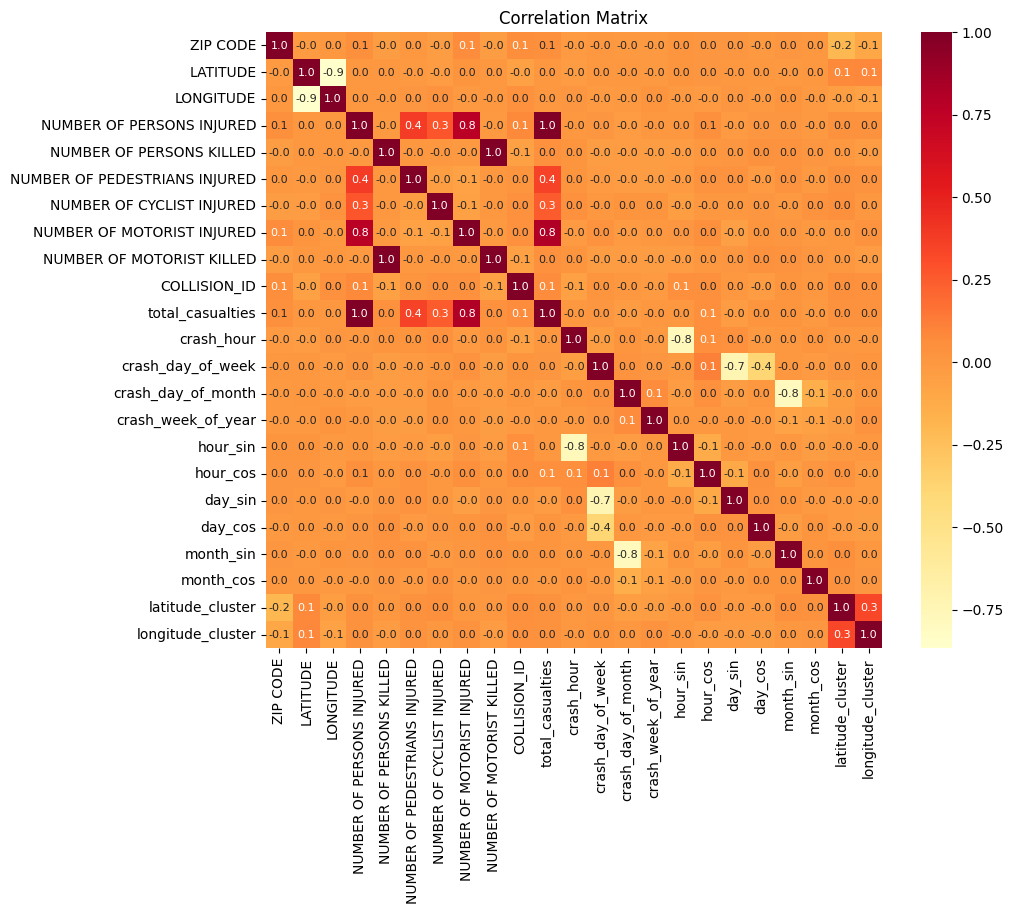

In [67]:
# Correlation Matrix
corr_matrix = df.drop(columns=['NUMBER OF CYCLIST KILLED','NUMBER OF PEDESTRIANS KILLED']).select_dtypes(exclude='object').corr()
plt.figure(figsize=(10, 8))
# sns.heatmap(corr_matrix, cmap='YlOrRd', annot=True)
sns.heatmap(corr_matrix,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='YlOrRd')
plt.title('Correlation Matrix')
plt.show()

## Observation:
- The heatmap shows that ‘NUMBER OF PERSONS INJURED’ is strongly correlated with ‘TOTAL CASUALTIES’, indicating that as injuries increase, so do total casualties. Additionally, ‘LATITUDE’ and ‘LONGITUDE’ exhibit a negative correlation, suggesting a geographical pattern in the data.

In [69]:
# Predictive Variables Analysis
# Identify the most predictive variables for the number of casualties
# Here we assume 'NUMBER OF PERSONS INJURED' as the target variable
target_variable = 'total_casualties'
correlation_with_target = corr_matrix[target_variable].sort_values(ascending=False)
print("Predictive Variables Analysis:")
print(correlation_with_target)

Predictive Variables Analysis:
total_casualties                 1.000000
NUMBER OF PERSONS INJURED        0.993729
NUMBER OF MOTORIST INJURED       0.815999
NUMBER OF PEDESTRIANS INJURED    0.356987
NUMBER OF CYCLIST INJURED        0.252411
COLLISION_ID                     0.070888
hour_cos                         0.054067
ZIP CODE                         0.051727
NUMBER OF PERSONS KILLED         0.037821
NUMBER OF MOTORIST KILLED        0.037821
latitude_cluster                 0.034493
longitude_cluster                0.033505
month_sin                        0.017294
day_cos                          0.016034
crash_day_of_week                0.010679
LATITUDE                         0.003899
hour_sin                         0.002186
LONGITUDE                        0.001435
crash_hour                      -0.001606
crash_week_of_year              -0.003206
month_cos                       -0.009357
crash_day_of_month              -0.022394
day_sin                         -0.023452
Nam

## Predictive Analysis Observation:
- NUMBER OF PERSONS INJURED (0.993729): Extremely high positive correlation with total casualties, indicating that as the number of injured persons increases, total casualties also rise significantly, suggesting that injury rates are a strong predictor of overall casualties in traffic incidents.
- NUMBER OF MOTORIST INJURED (0.815999): Strong positive correlation with total casualties, suggesting that injuries among motorists are a significant contributor to total casualties.
- NUMBER OF PEDESTRIANS INJURED (0.356987): Moderate positive correlation with total casualties, indicating that pedestrian injuries contribute to total casualties, albeit to a lesser extent than motorists.
- NUMBER OF CYCLIST INJURED (0.252411): Weakest positive correlation among the injury-related variables, suggesting that cyclist injuries have a lesser impact on total casualties compared to pedestrians and motorists.
- COLLISION_ID (0.070888): Low correlation with total casualties, suggesting that the unique identifier for collisions does not significantly influence total casualties.
- ZIP CODE (0.051727): Weak correlation with total casualties, indicating that geographical location alone may not be a strong predictor of casualties without considering other factors.
Latitude and Longitude Clusters (0.034493 and 0.033505): Minimal correlation with total casualties, suggesting that location may not play a significant role in predicting casualties when other factors are considered.
- hour_cos (0.054067) and hour_sin (0.002186): Very weak correlation with total casualties, suggesting that the time of day may not be a significant factor in determining the severity of incidents.
- crash_day_of_week (0.010679) and crash_week_of_year (-0.003206): Weak correlations with total casualties, indicating that the day of the week or week of the year does not significantly affect total casualties.

In [70]:
# Save the preprocessed DataFrame for further analysis
X_df.to_csv('preprocessed_nypd_collisions.csv', index=False)

In [71]:
df1 = pd.read_csv('preprocessed_nypd_collisions.csv')

In [73]:
df1.head() #you can use for futher analysis

,total_casualties,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,LATITUDE,LONGITUDE,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos,crash_week_of_year,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,BOROUGH_Unknown
0,-0.497662,-0.510593,-0.025828,0.032392,-0.040370,1.353843,-0.700190,-0.647896,-1.220390,-1.328436,0.539304,1.050878,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.497662,-0.510593,-0.025828,0.029107,-0.049326,1.353843,-0.700190,-1.142891,0.926435,0.994612,1.028992,1.118381,0.0,1.0,0.0,0.0,0.0,0.0
2,1.464295,1.612722,-0.025828,0.037142,-0.032126,1.587067,-0.383255,-0.030648,1.456657,-1.328436,0.539304,1.118381,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.497662,-0.510593,-0.025828,0.111317,-0.048730,0.695950,-1.096261,0.586600,-1.220390,1.236359,-0.589670,0.915873,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.497662,-0.510593,-0.025828,0.081301,-0.052503,0.695950,-1.096261,-1.417592,-0.264963,-0.696234,-1.211634,-1.109201,0.0,0.0,1.0,0.0,0.0,0.0
